In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np

In [2]:
SUBJECT = "C001"
group = "control"
if SUBJECT.startswith("T"):
    group = "test"

montage = mne.channels.make_standard_montage("standard_1020")

In [3]:
# load raw EEG data
raw_eeg_file = (
    f"/mnt/d/work/ped_neuro_eeg_data/bids/sub-{SUBJECT}/eeg/sub-{SUBJECT}_task-rest_eeg.vhdr"
)
raw = mne.io.read_raw_brainvision(raw_eeg_file, preload=True)
raw.pick(picks="eeg")

raw.set_montage(montage, match_case=False, on_missing="ignore")

Extracting parameters from /mnt/d/work/ped_neuro_eeg_data/bids/sub-C001/eeg/sub-C001_task-rest_eeg.vhdr...
Setting channel info structure...
Reading 0 ... 306761  =      0.000 ...  1227.044 secs...


<RawBrainVision | sub-C001_task-rest_eeg.eeg, 27 x 306762 (1227.0 s), ~63.2 MiB, data loaded>

In [4]:
# load cleaned EEG data
cleaned_eeg_file = (
    f"/mnt/d/work/ped_neuro_eeg_data/bids/sub-{SUBJECT}/eeg/sub-{SUBJECT}_task-rest_cleaned_eeg.fif"
)
cleaned = mne.io.read_raw_fif(cleaned_eeg_file, preload=True)
cleaned.set_montage(montage, match_case=False, on_missing="ignore")

Opening raw data file /mnt/d/work/ped_neuro_eeg_data/bids/sub-C001/eeg/sub-C001_task-rest_cleaned_eeg.fif...
    Range : 0 ... 306761 =      0.000 ...  1227.044 secs
Ready.
Reading 0 ... 306761  =      0.000 ...  1227.044 secs...


<Raw | sub-C001_task-rest_cleaned_eeg.fif, 19 x 306762 (1227.0 s), ~44.5 MiB, data loaded>

Using matplotlib as 2D backend.


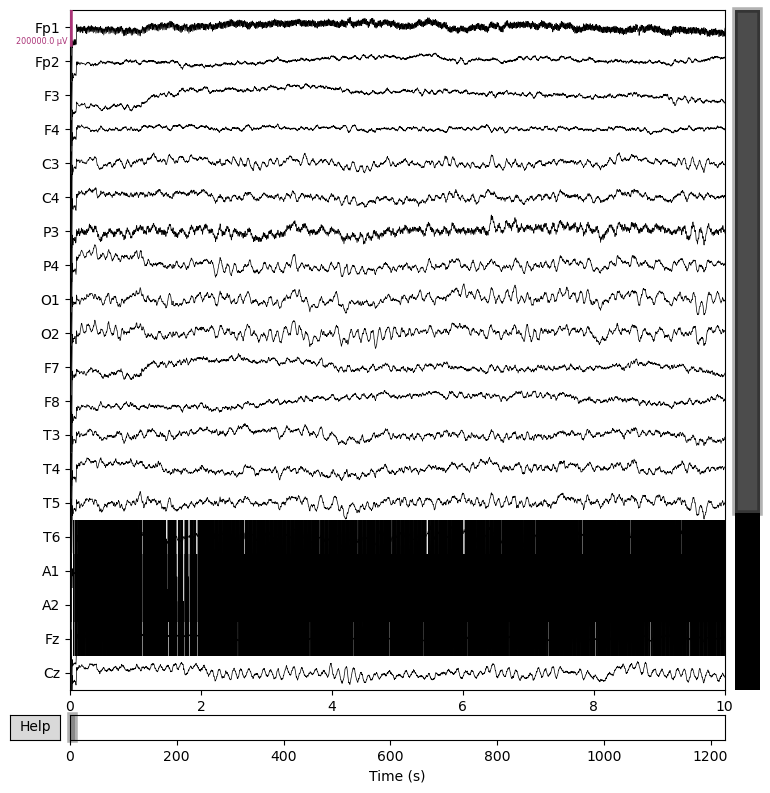

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/home/jure/miniconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


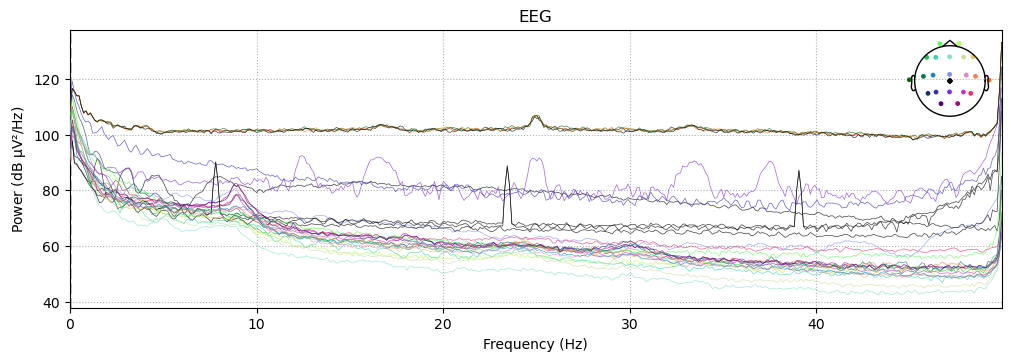

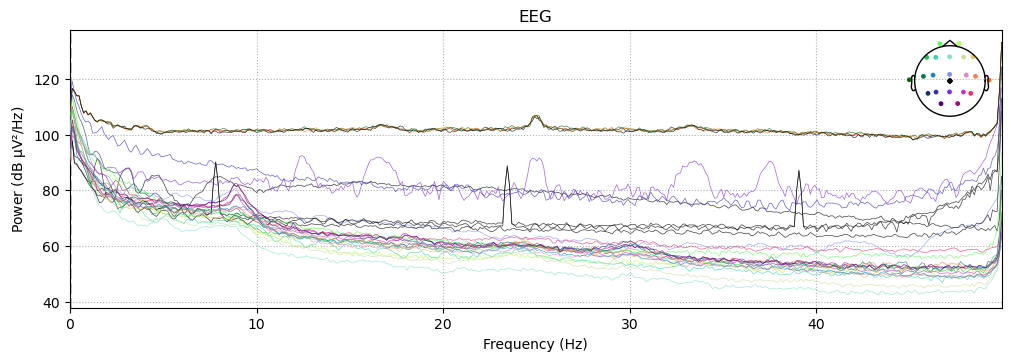

In [5]:
# raw data plots
raw.plot(scalings={"eeg": 10e-2})
raw.compute_psd(fmax=50).plot()

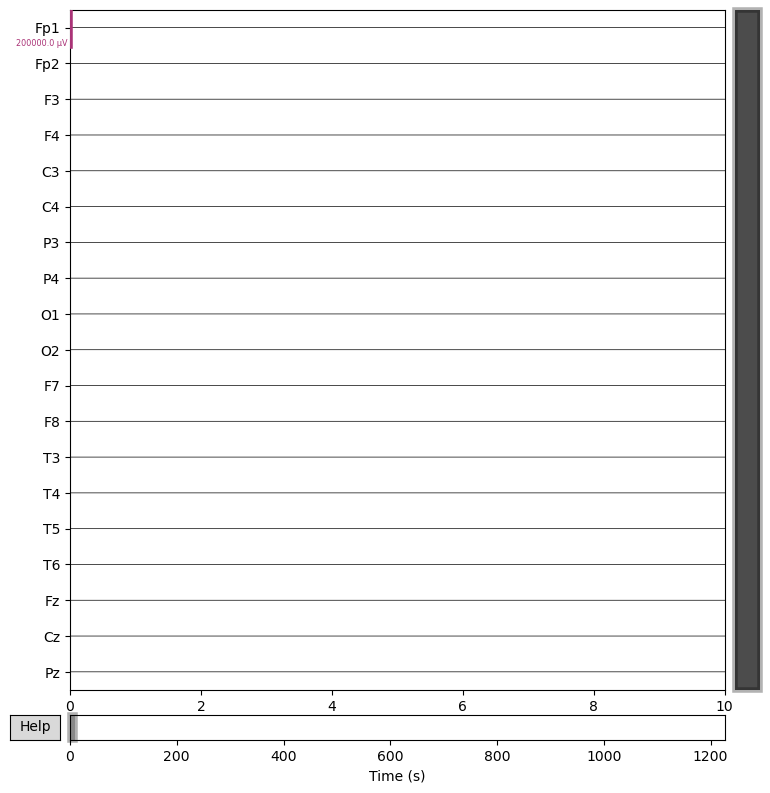

Effective window size : 8.192 (s)
Plotting power spectral density (dB=True).


/tmp/ipykernel_28294/61148571.py:3: UserWarning: Zero value in spectrum for channels Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, T6, Fz, Cz, Pz
  cleaned.compute_psd(fmax=50).plot()
/tmp/ipykernel_28294/61148571.py:3: UserWarning: Infinite value in PSD for channels Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, T6, Fz, Cz, Pz.
These channels might be dead.
  cleaned.compute_psd(fmax=50).plot()
/home/jure/miniconda3/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


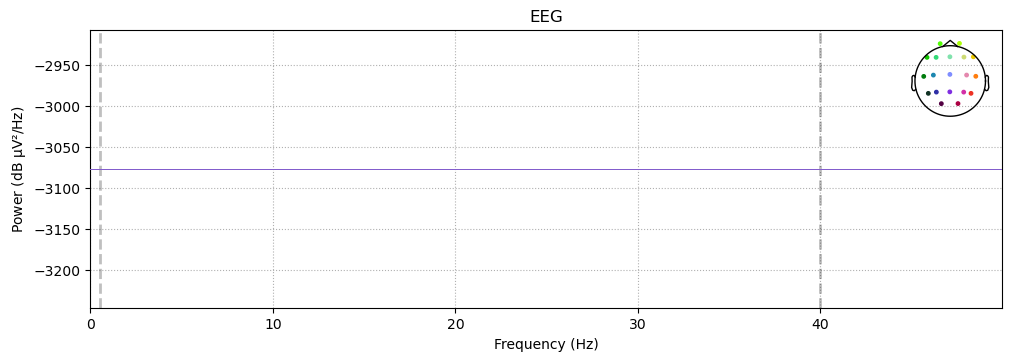

In [6]:
# cleaned data plots
cleaned.plot(scalings={"eeg": 10e-2})
cleaned.compute_psd(fmax=50).plot()